In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
df=pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [2]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [4]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
df.shape

(375, 6)

In [7]:
df.duplicated().sum()

np.int64(50)

In [8]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1.0,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0.0,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,1.0,Master's,Director of Operations,19.0,170000.0
372,29.0,0.0,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,1.0,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [9]:
df = df.dropna()
print("Shape after dropping nulls:", df.shape)

Shape after dropping nulls: (373, 6)


In [10]:
edu_map = {"Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(edu_map)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\231868525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].map(edu_map)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,1,Software Engineer,5.0,90000.0
1,28.0,0.0,2,Data Analyst,3.0,65000.0
2,45.0,1.0,3,Senior Manager,15.0,150000.0
3,36.0,0.0,1,Sales Associate,7.0,60000.0
4,52.0,1.0,2,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0.0,1,Senior Marketing Analyst,8.0,85000.0
371,43.0,1.0,2,Director of Operations,19.0,170000.0
372,29.0,0.0,1,Junior Project Manager,2.0,40000.0
373,34.0,1.0,1,Senior Operations Coordinator,7.0,90000.0


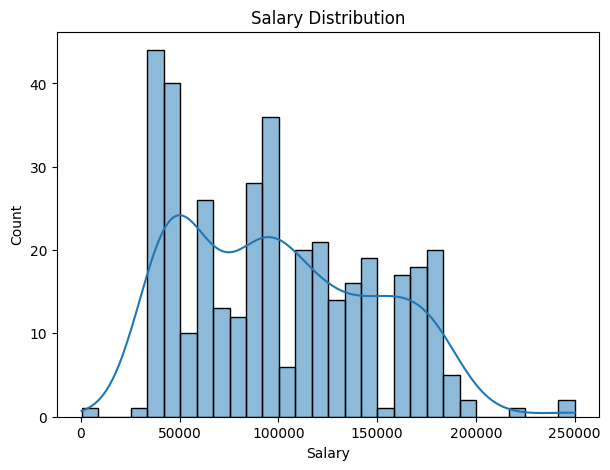

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title("Salary Distribution")
plt.show()

In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Skewness of numeric columns:\n")
for col in num_cols:
    print(f"{col}: {df[col].skew():.3f}")


Skewness of numeric columns:

Age: 0.198
Gender: -0.081
Education Level: 0.965
Years of Experience: 0.361
Salary: 0.401


In [13]:
df['Education Level'] = np.log1p(df['Education Level'])
df['Salary'] = np.sqrt(df['Salary'])
print("Reduced Skewness:")
print("Education Level:", df['Education Level'].skew())
print("New Salary skewness:", df['Salary'].skew())

Reduced Skewness:
Education Level: 0.7642407209052492
New Salary skewness: -0.039675354837162634


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\1169839079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = np.log1p(df['Education Level'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\1169839079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = np.sqrt(df['Salary'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\3404387366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_log'] = np.log1p(df['Salary'])   # log transformation


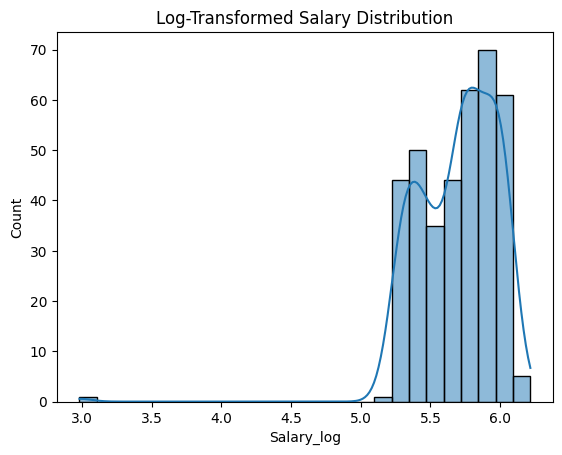

In [14]:
df['Salary_log'] = np.log1p(df['Salary'])   # log transformation
sns.histplot(df['Salary_log'], kde=True)
plt.title("Log-Transformed Salary Distribution")
plt.show()

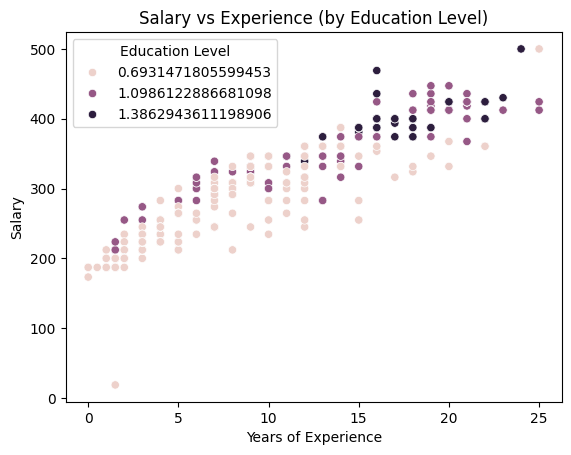

In [15]:
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Education Level')
plt.title("Salary vs Experience (by Education Level)")
plt.show()

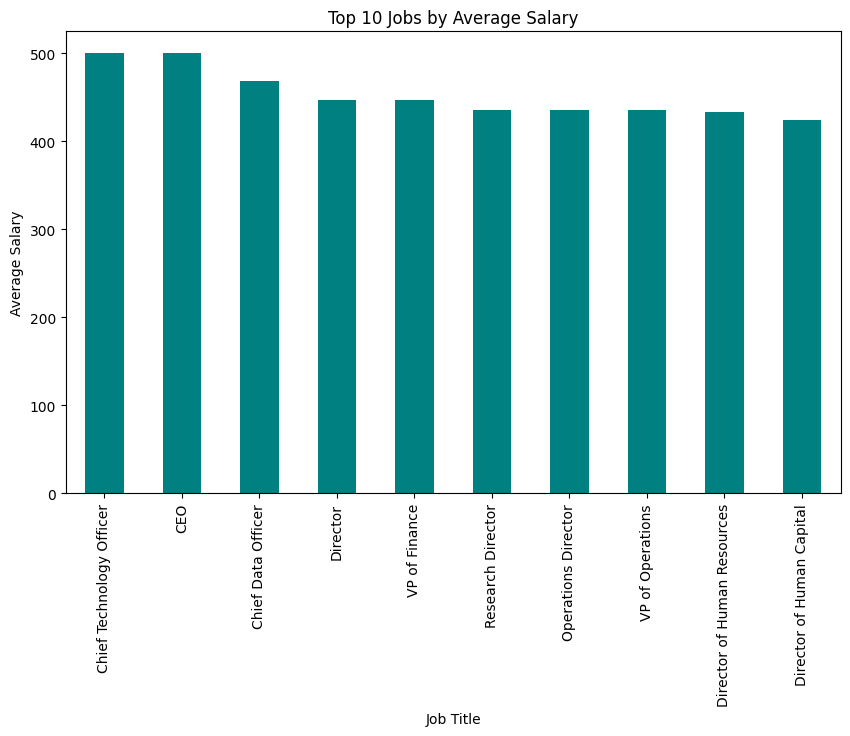

In [16]:
plt.figure(figsize=(10,6))
df.groupby("Job Title")["Salary"].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Jobs by Average Salary")
plt.ylabel("Average Salary")
plt.show()


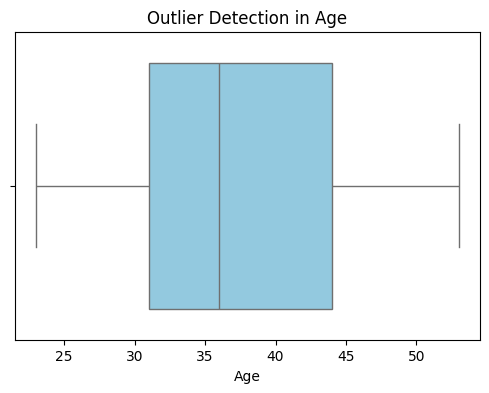

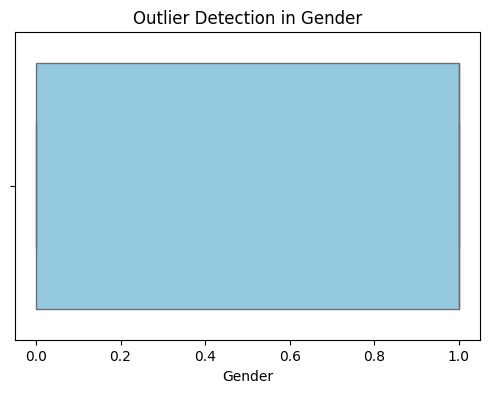

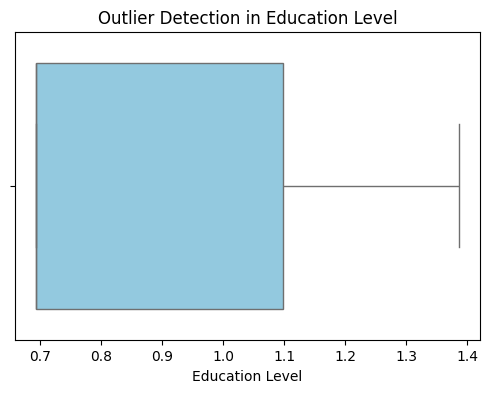

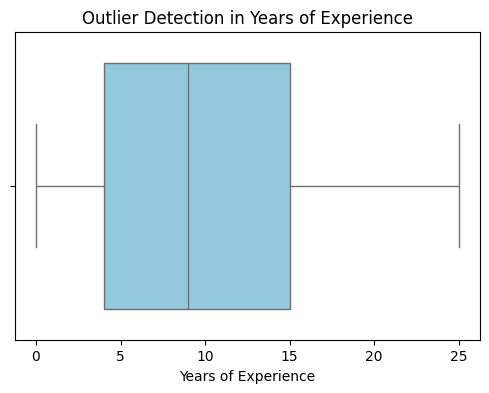

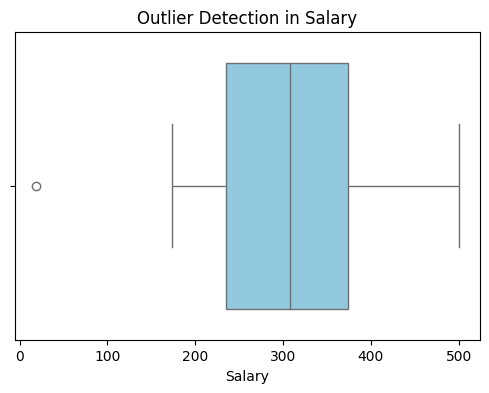

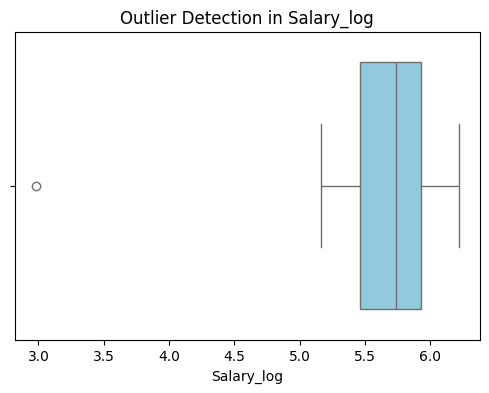

In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Outlier Detection in {col}")
    plt.show()

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Gender: 0 outliers
Education Level: 0 outliers
Years of Experience: 0 outliers
Salary: 1 outliers
Salary_log: 1 outliers


In [19]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_log
0,32.0,1.0,0.693147,Software Engineer,5.0,300.000000,5.707110
1,28.0,0.0,1.098612,Data Analyst,3.0,254.950976,5.544986
2,45.0,1.0,1.386294,Senior Manager,15.0,387.298335,5.961774
3,36.0,0.0,0.693147,Sales Associate,7.0,244.948974,5.505124
4,52.0,1.0,1.098612,Director,20.0,447.213595,6.105270
...,...,...,...,...,...,...,...
370,35.0,0.0,0.693147,Senior Marketing Analyst,8.0,291.547595,5.678627
371,43.0,1.0,1.098612,Director of Operations,19.0,412.310563,6.024199
372,29.0,0.0,0.693147,Junior Project Manager,2.0,200.000000,5.303305
373,34.0,1.0,0.693147,Senior Operations Coordinator,7.0,300.000000,5.707110


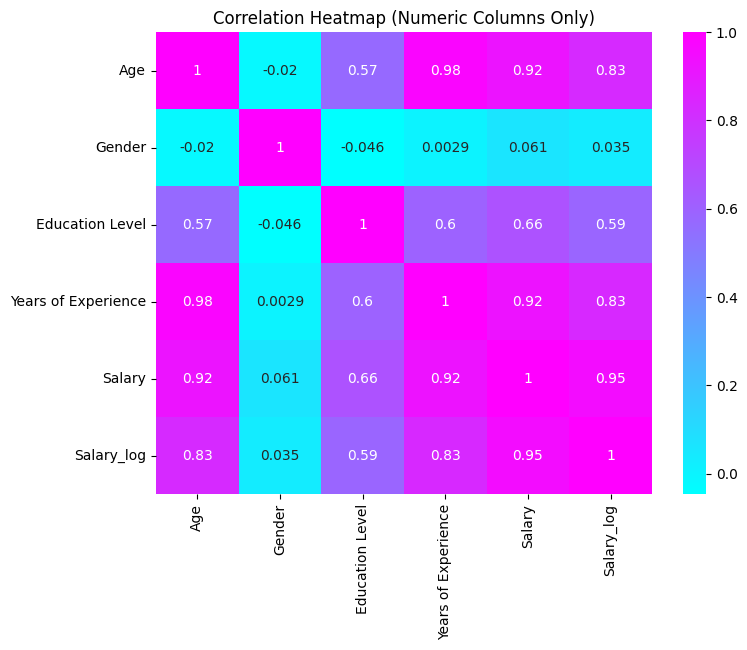

In [20]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap="cool")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [21]:
X = df[['Age', 'Gender', 'Education Level', 'Years of Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Results:
Mean Absolute Error (MAE): 17.82
Mean Squared Error (MSE): 517.85
Root Mean Squared Error (RMSE): 22.76
R² Score: 0.91


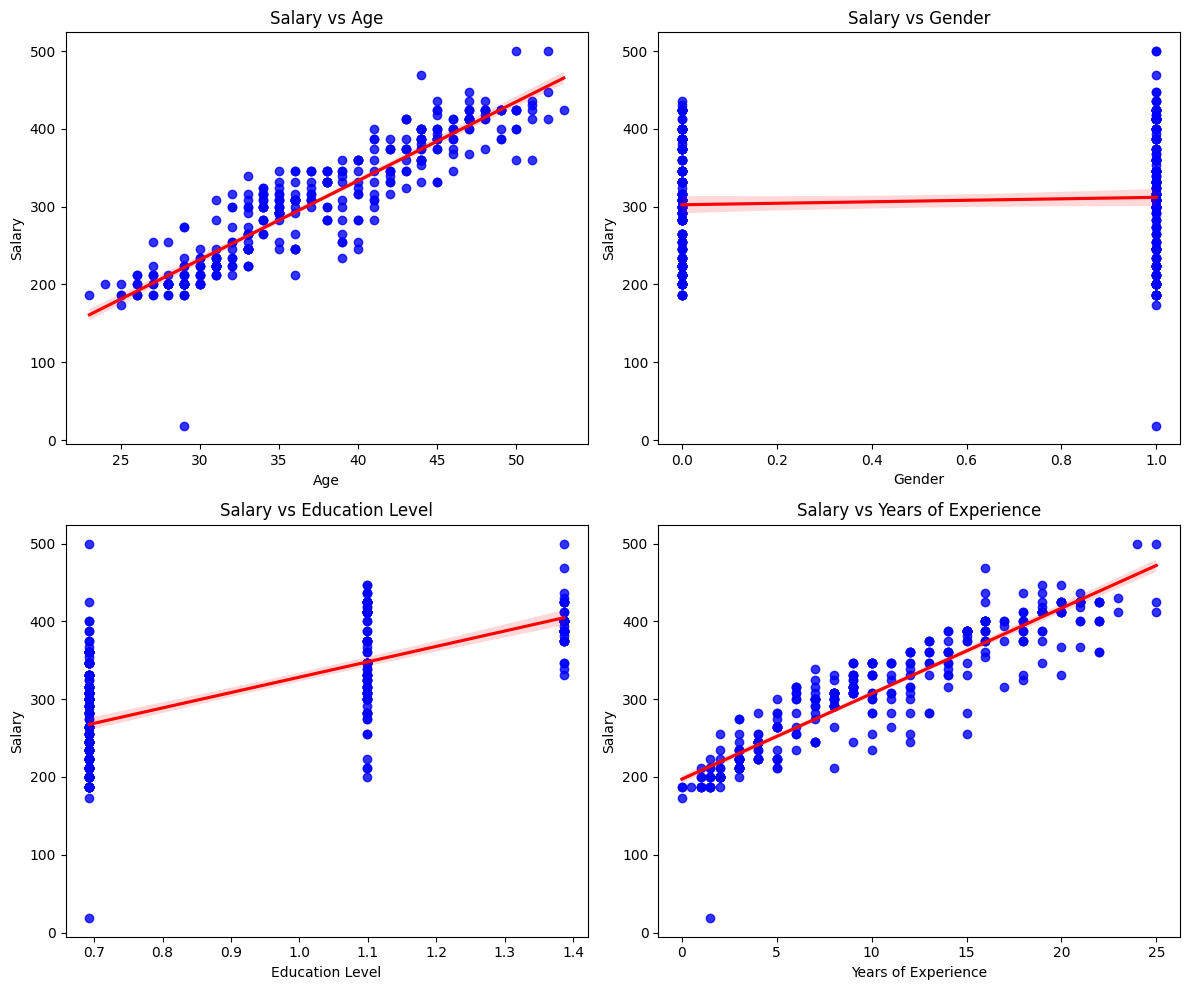

In [23]:
features = ['Age', 'Gender', 'Education Level', 'Years of Experience']
plt.figure(figsize=(12, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=df[col], y=df['Salary'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')
plt.tight_layout()
plt.show()